### 儿童死亡率--多元回归分析

数据解释：<br/>
CM：每千人中不足五岁便死亡的人数<br/>
PGNP:人均GDP<br/>
FLR：妇女识字率<br/>
计量经济学第五版P218<br/>

In [9]:
import numpy as np 
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_excel('data/儿童死亡率.xls')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
CM      64 non-null int64
FLR     64 non-null int64
PGNP    64 non-null int64
TFR     64 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


In [12]:
df.describe()

,CM,FLR,PGNP,TFR
count,64.000000,64.000000,64.000000,64.000000
mean,141.500000,51.187500,1401.250000,5.549687
std,75.978067,26.007859,2725.695775,1.508993
min,12.000000,9.000000,120.000000,1.690000
25%,82.000000,29.000000,300.000000,4.607500
50%,138.500000,48.000000,620.000000,6.040000
75%,192.500000,77.250000,1317.500000,6.615000
max,312.000000,95.000000,19830.000000,8.490000


In [13]:
df.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


### 双变量回归分析--儿童死亡率与人均GNP

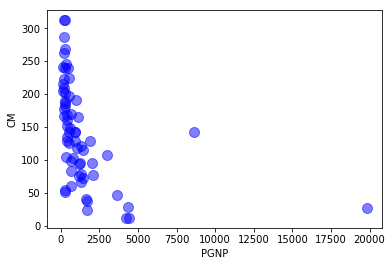

In [14]:
#注意看有两个异常值
df.plot(kind='scatter',x='PGNP',y='CM',c='blue',s=100,alpha=0.5)

In [15]:
results = smf.ols('CM ~ 1 +PGNP', data=df).fit()

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           0.000826
Time:                        21:48:05   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.4244      9.846     15.989      0.0

#回归方程
CM=157.4244 -0.0114*PGNP

PGNP的系数为-0.0114，与预期一致，对CM有负影响，人均GNP每提高1单位，CM将减少0.0114单位
t=-3.516，p=0.001,均显著，表明PGNP对CM有影响，应该包含在模型当中。
####  R2为0.166，说明儿童死亡率的变异中，有16.6%可由PGNP来解释，这个R2并不高，说明模型拟合效果一般。
#### 雅克-贝拉检验表明：JB统计量2.545，在正态性假定下，得到这样一个统计量的概率为28%。不拒绝残差项
#### 是正态分布的假设。

#### F-statistic:12.36，Prob (F-statistic):0.000826，拒绝人均GNP对儿童死亡率没有影响的假设

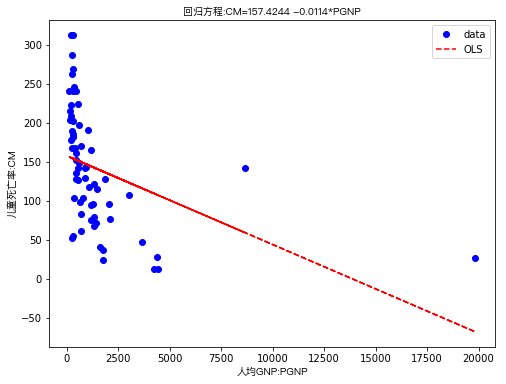

In [17]:
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc') 
from matplotlib.font_manager import FontManager, FontProperties  
x=df.PGNP.values
y=df.CM.values
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'bo', label="data") #蓝色圈圈
ax.plot(x, results.predict(), 'r--', label="OLS")
ax.legend(loc='best') #loc='best' 最佳位置
ax.set_title('回归方程:CM=157.4244 -0.0114*PGNP',fontproperties=getChineseFont())
ax.set_ylabel('儿童死亡率:CM',fontproperties=getChineseFont())
ax.set_xlabel('人均GNP:PGNP',fontproperties=getChineseFont())
plt.show()

从上图可以看出异常值对模型的影响非常大，因此使用普通最小二乘法建模时，先要清洗一下异常值

### 去除两个异常值之后的回归

In [18]:
df.sort_values(by='PGNP',ascending=False).head()

,CM,FLR,PGNP,TFR
29,27,63,19830,5.23
32,142,50,8640,7.17
52,12,79,4430,1.69
57,28,95,4370,2.86
23,12,81,4240,1.80


In [19]:
df=df[df.PGNP<8000]

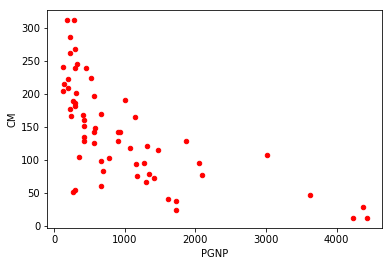

In [20]:
df.plot(kind='scatter',x='PGNP',y='CM',c='red')

In [21]:
results = smf.ols('CM ~ 1 +PGNP', data=df).fit()

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     46.62
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           4.91e-09
Time:                        21:48:06   Log-Likelihood:                -337.98
No. Observations:                  62   AIC:                             680.0
Df Residuals:                      60   BIC:                             684.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    191.1177     10.098     18.927      0.0

常数项系数：157.4244 增加到 191.1177 
PGNP:-0.0114   增加到  -0.0484
r方由0.166增加到0.437
普通最小二乘法对异常值异常敏感

### 儿童死亡率与妇女识字率

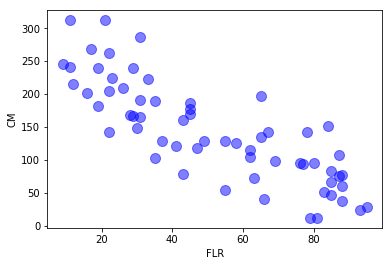

In [23]:
df.plot(kind='scatter',x='FLR',y='CM',c='blue',s=100,alpha=0.5)

In [24]:
results = smf.ols('CM ~ 1 +FLR', data=df).fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     126.8
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           1.99e-16
Time:                        21:48:06   Log-Likelihood:                -320.60
No. Observations:                  62   AIC:                             645.2
Df Residuals:                      60   BIC:                             649.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    264.0537     12.051     21.911      0.0

### 三变量回归分析：儿童死亡率与人均GNP和妇女识字率

In [26]:
results2 = smf.ols('CM ~ 1 +PGNP+FLR', data=df).fit()

In [27]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     77.88
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           2.80e-17
Time:                        21:48:06   Log-Likelihood:                -315.75
No. Observations:                  62   AIC:                             637.5
Df Residuals:                      59   BIC:                             643.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    260.1982     11.304     23.019      0.0

回归方程：CM=260-0.0196PGNP-1.9116FLR

PGNP的偏回归系数为-0.0196，与预期一致，对CM有负影响，在保持其它因素不变时，PGNP每提高1单位，CM将减少0.0196个单位
与-0.0484相比，PGNP对CM的影响减小了，说明我们的双变量回归模型有设定误差。
t=-3.162，p=0.002,均显著，表明PGNP对CM有影响，应该包含在模型当中。
如果虚拟假设正确，得到一个小于3.162的t值得概率为0.002.

FLR的偏回归系数为-1.916，与预期一致，对CM有负影响，妇女识字率越高，儿童死亡率越低。保持其它因素不变，FLR每提高1单位，CM将减少1.916单位

t=-7.865 ，p=0.000,均显著，表明PGNP对CM有影响，应该包含在模型当中。

调整R2为 0.716，说明儿童死亡率的变异中，有71.6%可由模型来解释，这个R2很高，说明模型拟合效果很好。
雅克-贝拉检验表明：JB统计量0.673，在正态性假定下，得到这样一个统计量的概率为79.2%%。不拒绝残差项是正态分布的假设。
注意：JB检验为大样本检验，64次观测可能不够多。
skew：残差的偏度，正态分布为0
kurtosis：残差的峰度，正态分布为3

### 整体显著性检验
<p>$H_0:\beta_1=\beta_2=0$<p/>
<p>F-statistic:73.83,在零假设下，得到这样一个值得概率，<p/>
<p>Prob (F-statistic):5.12e-17，认为妇女识字率和人均GNP对儿童死亡率有显著影响<p/>


### 残差项的分布图

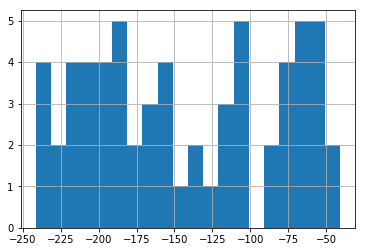

In [38]:
#残差看着也不像正态分布呀
(df.CM-results.predict()).hist(bins=20)

### 如果新增变量的t值在绝对值上大于1,调整$R^2$就会增加

### 标准化三变量回归分析

In [28]:
#对数据标准化，均值为0，标准差为1
df=df.apply(lambda x: (x-np.mean(x))/np.std(x))

In [29]:
df.describe()

,CM,FLR,PGNP,TFR
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
mean,-6.009977e-17,-1.432546e-17,2.327887e-17,8.523648e-16
std,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00
min,-1.747160e+00,-1.605335e+00,-8.443568e-01,-2.548204e+00
25%,-7.660855e-01,-8.411833e-01,-6.691099e-01,-7.874272e-01
50%,-6.436792e-02,-1.916542e-01,-4.013717e-01,3.394037e-01
75%,6.938862e-01,1.021437e+00,2.971815e-01,6.945462e-01
max,2.243651e+00,1.680518e+00,3.351831e+00,1.965758e+00


In [30]:
results3 = smf.ols('CM ~ PGNP+FLR', data=df).fit()#注意没有截距项

In [31]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     77.88
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           2.80e-17
Time:                        21:48:06   Log-Likelihood:                -47.922
No. Observations:                  62   AIC:                             101.8
Df Residuals:                      59   BIC:                             108.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.327e-17      0.068  -1.22e-15      1.0

保持其它变量不变，PGNP每提高一个标准差，导致CM平均下降0.2676个标准差。<br/>
保持其它变量不变，FLR提高一个标准差，导致CM平均下降0.6656个标准差<br/>
相对而言，妇女识字率比人均GNP对儿童死亡率的影响更大。<br/>
标准化回归，可以看出哪个变量的影响更大

In [32]:
#PGNP和FLR同时提高1单位,每1000名儿童中不足5岁便死亡的儿童数约降低2.24人
-0.0056*1-2.2316*1

-2.2371999999999996